The behavior of the risky asset, with a constant interest rate $r$, is described by
$$dS_t = rS_tdt + \sigma(X_t)dWt$$
where $X$ is a continuous time markov chain and $W$ is a standard brownian motion.

To simulate this, we first instanciate a continuous time markov with, for example, 3 states and provide 3 values for sigma.

In [33]:
from stochastic_process.markov_chain import Sigma, MarkovChain

sigma = Sigma(0.2, 0.5, 0.8)
X = MarkovChain(5, 3, 7, 2, 4, 9)

The combination fo this two allow us to compute $\sigma$'s paths. 

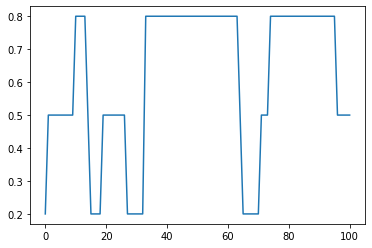

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Compute X_paths. Here we just compute one
delta_t = 0.01
random_sample_for_X = np.random.rand(1, 100)
X_paths = X.paths(random_sample_for_X, delta_t)
X_path = X_paths[0]

# Map X state's values to sigma's state values
sigma_paths = sigma.paths(X_paths)
sigma_path = sigma_paths[0]

plt.plot(sigma_path)

We can now create a risky asset built on this two objects and a specified interest rate $r$.

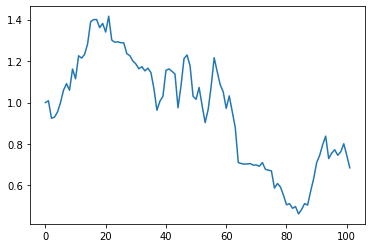

In [35]:
from stochastic_process.risky_asset import RiskyAsset

r = 0.05
S_0 = 1
S = RiskyAsset(current_price=S_0)

S_paths = S.paths(delta_t, sigma_paths, r)
S_path = S_paths[0]

plt.plot(S_path)

Considering the two process $\sigma_t$ and $S_t$, one can see how $\sigma$'s values impact the behavior of S:

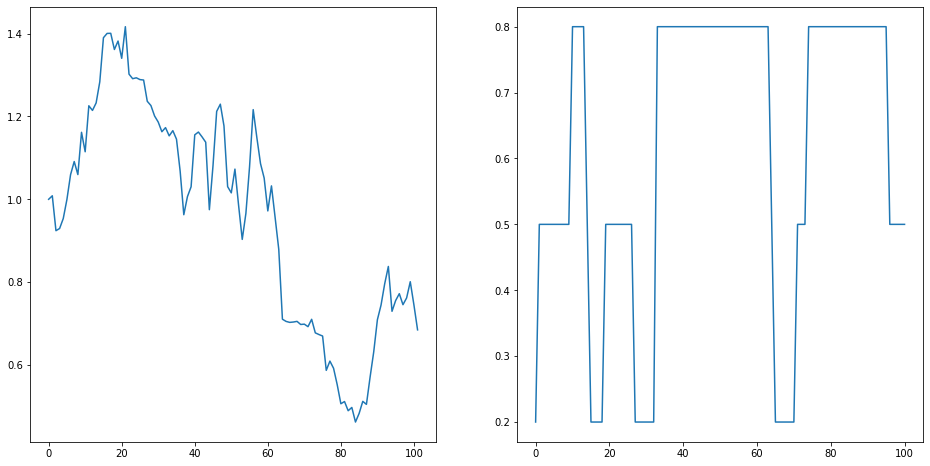

In [36]:
fig=plt.figure(figsize=(16, 8))
S_ax = fig.add_subplot(121)
sigma_ax = fig.add_subplot(122)

S_ax.plot(S_path)
sigma_ax.plot(sigma_path)